In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ny = "Resources/new_york.csv"

In [3]:
ny = pd.read_csv(ny, delimiter = ", ")
ny[["Year", "Month", "Day"]]=ny["date"].str.split("/", n=2, expand=True)
ny.drop(columns=["date"], inplace=True)
ny["Year"]=ny["Year"].astype(int)
ny["Month"]=ny["Month"].astype(int)
#ny=ny[ny["Year"]>2017]
ny=ny[ny["Month"]<8]
bins_df = ny.dropna(subset = ['pm25'])
bins_df

/Users/gagethompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,pm25,o3,no2,co,Year,Month,Day
0,31,48.0,11,2.0,2020,7,2
1,34,46.0,8,2.0,2020,7,3
2,51,16.0,1,1.0,2020,7,4
3,61,55.0,6,2.0,2020,7,5
4,64,57.0,14,2.0,2020,7,6
...,...,...,...,...,...,...,...
2381,42,NaN,",",NaN,2014,3,28
2382,64,NaN,",",NaN,2014,3,29
2383,32,NaN,",",NaN,2014,3,30
2384,18,NaN,",",NaN,2014,3,31


In [4]:
AQI2018 = []
for value in bins_df["pm25"]:
    if value >= 0 and value <= 12:
        AQI2018.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2018.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2018.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2018.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2018.append("invalid")
AQI2018 = [round(i,1) for i in AQI2018]
bins_df["AQI"] = AQI2018

In [5]:
bins = [0, 50, 100, 150, 200, 300, 500]
quality = ["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"]

bins_df["Levels of Concern"]=pd.cut(bins_df["AQI"], bins, labels = quality, include_lowest = True)
bins_df.drop(columns = ["pm25", "o3", "no2", "co"], inplace = True)
bins_df

,Year,Month,Day,AQI,Levels of Concern
0,2020,7,2,90.7,Moderate
1,2020,7,3,97.1,Moderate
2,2020,7,4,139.2,Unhealthy for Sensitive Groups
3,2020,7,5,153.8,Unhealthy
4,2020,7,6,155.4,Unhealthy
...,...,...,...,...,...
2381,2014,3,28,117.0,Unhealthy for Sensitive Groups
2382,2014,3,29,155.4,Unhealthy
2383,2014,3,30,92.8,Moderate
2384,2014,3,31,63.4,Moderate


In [6]:
ny_agg = bins_df.groupby(["Year","Month"]).agg({"AQI":["min","max","mean", "sem"]})
ny_months = ny_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
ny_months

AQI                             
              min    max        mean       sem
Year Month                                    
2014 Jan    107.2  177.6  150.266667  2.973374
     Feb     90.7  174.5  149.150000  3.017881
     Mar     63.4  162.1  125.235484  4.447685
     Apr     71.8  163.1  115.750000  4.888767
     May     61.3  159.0  106.019355  5.156010
     June    65.5  158.5   98.140000  5.031045
     Jul     57.1  155.4  109.425806  4.529504
2015 Jan    117.0  163.6  147.140000  2.005553
     Feb    124.4  161.1  149.242857  1.772470
     Mar     84.4  168.8  129.922581  4.780164
     Apr     61.3  152.3  100.880000  5.064296
     May     65.5  162.6  124.241935  5.450275
     June    25.0  169.3   99.403333  6.284781
     Jul     61.3  165.7  130.532258  5.149476
2016 Jan     97.1  168.3  141.030000  3.568667
     Feb     80.2  160.5  127.810345  4.224895
     Mar     69.7  165.2  111.638710  5.561167
     Apr     67.6  166.7  106.360000  4.506283
     May     50.0  162.1  109.167742  6.737192
     June    55.0  153.3  108.740000  4.667731
     Jul     57.1  155.4  110.574194  5.613971
2017 Jan     71.8  156.9  132.213333  4.128504
     Feb     90.7  160.5  129.146429  3.912345
     Mar     73.9  155.9  111.906452  4.141643
     Apr     37.5  155.9   94.753333  5.674166
     May     16.7  156.4   80.519355  5.286881
     June    52.9  157.4  101.413333  5.603100
     Jul     57.1  158.0  107.616129  6.142582
2018 Jan    107.2  161.6  137.148387  3.010804
     Feb     78.1  155.4  124.225000  3.980361
     Mar     61.3  151.3   93.254839  4.221387
     Apr     57.1  154.9   97.280000  4.686379
     May     61.3  154.4  103.683871  5.012009
     June    52.9  155.4   95.783333  5.309220
     Jul     37.5  169.3  104.532258  6.729306
2019 Jan     95.0  155.4  128.173333  3.157549
     Feb     50.0  159.0  112.085714  5.938623
     Mar     67.6  144.1  102.154839  3.838385
     Apr     50.0  182.2   83.843333  4.754354
     May     20.8  146.6   78.238710  5.404498
     June    45.8  151.3   93.633333  5.646505
     Jul     50.0  171.4  122.174194  5.841606
2020 Jan     92.8  162.6  126.116667  3.883351
     Feb     73.9  156.9  115.700000  4.496077
     Mar     45.8  129.3   85.851613  3.208077
     Apr     33.3  114.5   73.986667  3.520951
     May     25.0  139.2   68.432258  3.772787
     June    37.5  151.3   88.673333  5.184193
     Jul     25.0  155.4   99.356000  7.946247

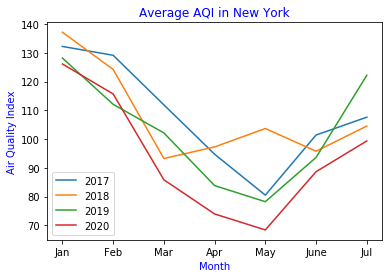

In [7]:
ax1 = ny_months["AQI"]["mean"].loc[2017].plot.line(label=2017)
ax2 = ny_months["AQI"]["mean"].loc[2018].plot.line(label=2018)
ax3 = ny_months["AQI"]["mean"].loc[2019].plot.line(label=2019)
ax4 = ny_months["AQI"]["mean"].loc[2020].plot.line(label=2020)
plt.title("Average AQI in New York", color = "blue")
plt.ylabel("Air Quality Index", color = "blue")
plt.xlabel("Month", color = "blue")
plt.legend()
plt.show()

In [8]:
ny_months_df = bins_df.groupby(["Year","Month"]).mean()
ny_months_df["AQI"] = round(ny_months_df["AQI"])
ny_months_df

AQI
Year Month       
2014 1      150.0
     2      149.0
     3      125.0
     4      116.0
     5      106.0
     6       98.0
     7      109.0
2015 1      147.0
     2      149.0
     3      130.0
     4      101.0
     5      124.0
     6       99.0
     7      131.0
2016 1      141.0
     2      128.0
     3      112.0
     4      106.0
     5      109.0
     6      109.0
     7      111.0
2017 1      132.0
     2      129.0
     3      112.0
     4       95.0
     5       81.0
     6      101.0
     7      108.0
2018 1      137.0
     2      124.0
     3       93.0
     4       97.0
     5      104.0
     6       96.0
     7      105.0
2019 1      128.0
     2      112.0
     3      102.0
     4       84.0
     5       78.0
     6       94.0
     7      122.0
2020 1      126.0
     2      116.0
     3       86.0
     4       74.0
     5       68.0
     6       89.0
     7       99.0

In [9]:
pwd

'/Users/gagethompson/Desktop/HOMEWORK/project-one'

In [9]:
ny_months_df.to_csv("project_one_csv/NewYork_months.csv")

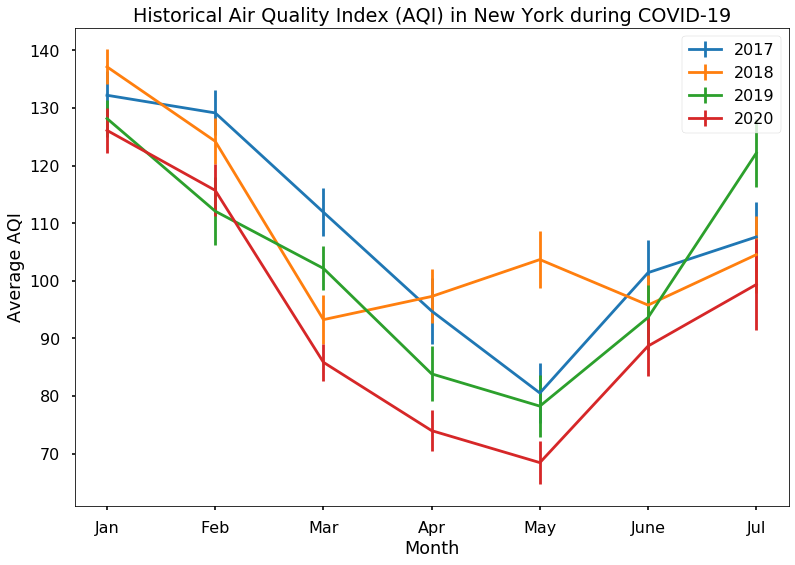

In [10]:
plt.style.use('seaborn-poster')
ny_months["AQI"]["mean"].loc[2017].plot.line(label=2017, yerr=ny_months["AQI"]["sem"].loc[2017])
ny_months["AQI"]["mean"].loc[2018].plot.line(label=2018, yerr=ny_months["AQI"]["sem"].loc[2018])
ny_months["AQI"]["mean"].loc[2019].plot.line(label=2019, yerr=ny_months["AQI"]["sem"].loc[2019])
ny_months["AQI"]["mean"].loc[2020].plot.line(label=2020, yerr=ny_months["AQI"]["sem"].loc[2020])
plt.title("Historical Air Quality Index (AQI) in New York during COVID-19")
plt.ylabel("Average AQI")
plt.legend()
plt.show()